<a href="https://colab.research.google.com/github/keehyun0613/machine_learning/blob/master/ANN_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

w1 = np.random.randn(784, 50) / np.sqrt(784 / 2)
b1 = np.random.rand(50).reshape(1,50)

w2 = np.random.randn(50, 30) / np.sqrt(50 / 2)
b2 = np.random.rand(30).reshape(1,30)

w3 = np.random.randn(30, 10) / np.sqrt(30 / 2)
b3 = np.random.rand(10).reshape(1,10)

learn_rate = 0.01

11493376/11490434 [==============================] - 0s 0us/step


<function matplotlib.pyplot.show>

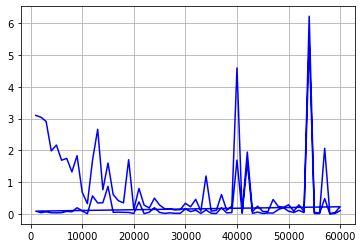

In [ ]:
def sigmoid(z_input):
    return 1 / (1 + np.exp(-z_input))

def cross_ent(a_input, t_input):
    return -(t_input * np.log(a_input) + (1 - t_input) * np.log(1 - a_input))

x_axis = []
y_axis = []

for epochs in range(2):
    for i in range(60000):
        x = x_train[i, :] / 255.0
        t = np.zeros(10)
        t[t_train[i]] = 1

        a0 = x.reshape(1,784)
        z1 = np.dot(a0,w1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, w2) + b2
        a2 = sigmoid(z2)
        z3 = np.dot(a2, w3) + b3
        a3 = sigmoid(z3)
        e = cross_ent(a3, t)
        cost = np.sum(e)

        delta3 = a3 * (1 - a3) * (-t / a3 + (1 - t) / (1 - a3))
        dcdw3 = np.dot(a2.transpose(), delta3)
        dcdb3 = delta3
        w3 = w3 - learn_rate * dcdw3
        b3 = b3 - learn_rate * dcdb3

        delta2 = a2 * (1 - a2) * np.dot(w3, delta3.transpose()).transpose()
        dcdw2 = np.dot(a1.transpose(), delta2)
        dcdb2 = delta2
        w2 = w2 - learn_rate * dcdw2
        b2 = b2 - learn_rate * dcdb2

        delta1 = a1 * (1 - a1) * np.dot(w2, delta2.transpose()).transpose()
        dcdw1 = np.dot(a0.transpose(), delta1)
        dcdb1 = delta1
        w1 = w1 - learn_rate * dcdw1
        b1 = b1 - learn_rate * dcdb1

        if ((i+1) % 1000 == 0):
            #print(i+1, cost)
            x_axis.append(i+1)
            y_axis.append(cost)

plt.grid()
plt.plot(x_axis, y_axis, color='b')
plt.show

In [ ]:
true_num = 0
for j in range(10000):
    xt = x_test[j, :] / 255.0
    tt = t_test[j]

    a0 = xt.reshape(1,784)
    z1 = np.dot(a0,w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2, w3) + b3
    a3 = sigmoid(z3)

    if (tt == np.argmax(a3)):
        true_num = true_num + 1
print(true_num / 10000)

0.9506


<function matplotlib.pyplot.show>

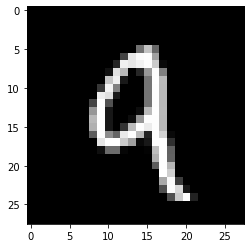

In [ ]:
xp = x_test[125,:].reshape(1,784)
img = xp.reshape(28,28)
plt.imshow(img, cmap = 'gray')
plt.show

In [ ]:
a0 = xp.reshape(1,784) / 255.0
z1 = np.dot(a0,w1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, w2) + b2
a2 = sigmoid(z2)
z3 = np.dot(a2, w3) + b3
a3 = sigmoid(z3)
np.argmax(a3)

9